
## Regression avec un réseau neuronal profond   DNN

In [8]:
# chargement des bibliotheques .......

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
np.set_printoptions(precision=3, suppress=True)
print(tf.__version__)


2.6.0


## Collecter et prétraiter les données¶

La première étape consiste à collecter et prétraiter les données appropriées pour garantir qu'elles sont dans un format que le réseau neuronal peut utiliser. Cela peut impliquer le nettoyage des données, la gestion des valeurs manquantes et la normalisation des données.


In [9]:
# chargement du dataset..........


dataset = pd.read_csv('GOOGL.csv') 
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [ ]:
# descriptif des données




In [10]:
# nombre de lignes et de colonnes

dataset.shape

(2335, 7)

In [11]:
# pour visualiser les lignes NaN................

dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# pour supprimer les NaN..............

dataset=dataset.dropna()

In [12]:
# Pour voir le type de données de chaque colonne. 

dataset.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [13]:
# suppression des colonnes inutiles............

dataset=dataset.drop(['Date'], axis=1)

In [14]:
# divisions les données en un ensembles d'entrainement et de test...............

# utilisation de l'ensemble des données de test pour l'évaluation finale.........

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print('Nombre de lignes l entrainement',train_dataset.shape)
print('Nombre de lignes pour les test', test_dataset.shape)

Nombre de lignes l entrainement (1868, 6)
Nombre de lignes pour les test (467, 6)


In [15]:
# séparation  les entités des étiquettes...........
# séparation de la valeur cible des caractéristiques ( features )..........
# c'est cette cible que le modele va devoir prédire.

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close') # cible
test_labels = test_features.pop('Close') # cible

Dans l'analyse de régression utilisant un DNN, l'objectif est d'apprendre une fonction qui mappe les caractéristiques d'entrée à la sortie, de sorte que les prédictions faites par le modèle soient aussi précises que possible. Les caractéristiques d'entrée passent par la couche d'entrée du DNN puis sont traitées par les couches cachées, qui utilisent des fonctions d'activation non linéaires pour apprendre les relations complexes dans les données. La couche de sortie du DNN produit une prédiction pour la variable dépendante basée sur les caractéristiques d'entrée traitées

In [16]:
# normalisation les données avec (tf.keras.layers.Normalization)...........
# La première étape consiste à créer le calque :


normalizer = tf.keras.layers.Normalization(axis=-1)

In [17]:
# adaptez l'état de la couche de prétraitement aux données en appelant Normalization.adapt :

normalizer.adapt(np.array(train_features))

2023-11-28 18:40:54.784410: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [21]:
# fonction d affichage....

def plot_loss(history):
  plt.plot(history.history['loss'], label='MAE')
  plt.plot(history.history['val_loss'], label='val_MAE')
  plt.ylim([0, 1000])
  plt.xlabel('Epoch')
  plt.ylabel('Erreur en $ [Close]')
  plt.legend()
  plt.grid(True)

## Définir l'architecture du mdele

L'étape suivante consiste à définir l'architecture du réseau de neurones. Cela inclut la sélection du type de couches (couches denses ou convolutives), du nombre de neurones dans chaque couche et des fonctions d'activation à utiliser.


## Compiler le modele

Une fois l'architecture définie, il faut compiler le modèle. Cela implique de spécifier la fonction de perte, l'optimiseur et toutes les métriques que nous utiliserons pour évaluer le modèle.


In [27]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),# 2 couches Dense avec fonction activation relu
      layers.Dense(64, activation='relu'),
      layers.Dense(1) # une couche Dense linéaire à sortie unique
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [28]:
# Régression utilisant un DNN et plusieurs entrées

# Répétez le processus précédent en utilisant toutes les entrées.
# Les performances du modèle s'améliorent légèrement sur l'ensemble de données de validation.

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 5)                 11        
_________________________________________________________________
dense_1 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,620
Trainable params: 4,609
Non-trainable params: 11
_________________________________________________________________


## Entrainer le modele

L'étape suivante consiste à entraîner le modèle à l'aide des données prétraitées. Cela implique d'introduire les données dans le modèle et d'ajuster les poids et les biais des neurones du réseau pour minimiser la fonction de perte.


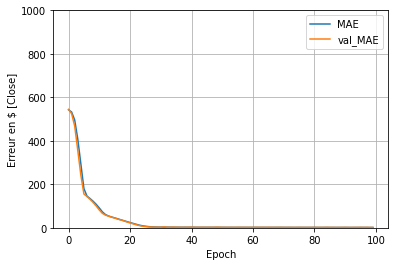

In [29]:
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)


plot_loss(history)

## Evaluer le modele

Une fois le modèle entraîné, il doit être évalué pour déterminer ses performances. Cela peut impliquer l'utilisation d'un ensemble de données distinct (ou d'un sous-ensemble des données d'entraînement) pour évaluer la capacité du modèle à effectuer des prédictions précises.


In [30]:
# je stock les résultats sur l'ensemble de test :

test_resultats['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [31]:
test_resultats

{'linear_model': 84.92025756835938, 'dnn_model': 1.6456290483474731}

## Faire des prédiction

Une fois le modèle affiné, nous pouvons l'utiliser pour prédire de nouvelles données.


In [32]:
# je fais des prédiction...

y_pred = dnn_model.predict(test_features)
print('prédiction index 1 .....',y_pred[1:2])
print('valeur attendue en position 1 et index',test_labels[1:2])

prédiction index 1 ..... [[204.832]]
valeur attendue en position 1 et index 3    205.405411
Name: Close, dtype: float64
